<h1 align="center">TensorFlow Neural Network Lab</h1>

<img src="image/notmnist.png">
In this lab, you'll use all the tools you learned from *Introduction to TensorFlow* to label images of English letters! The data you are using, <a href="http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html">notMNIST</a>, consists of images of a letter from A to J in different fonts.

The above images are a few examples of the data you'll be training on. After training the network, you will compare your prediction model against test data. Your goal, by the end of this lab, is to make predictions against that test set with at least an 80% accuracy. Let's jump in!

To start this lab, you first need to import all the necessary modules. Run the code below. If it runs successfully, it will print "`All modules imported`".

<img src="image/Mean_Variance_Image.png" style="height: 75%;width: 75%; position: relative; right: 5%">
## Problem 1
The first problem involves normalizing the features for your training and test data.

Implement Min-Max scaling in the `normalize_grayscale()` function to a range of `a=0.1` and `b=0.9`. After scaling, the values of the pixels in the input data should range from 0.1 to 0.9.

Since the raw notMNIST image data is in [grayscale](https://en.wikipedia.org/wiki/Grayscale), the current values range from a min of 0 to a max of 255.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$

*If you're having trouble solving problem 1, you can view the solution [here](https://github.com/udacity/deep-learning/blob/master/intro-to-tensorflow/intro_to_tensorflow_solution.ipynb).*


## Problem 2

Now it's time to build a simple neural network using TensorFlow. Here, your network will be just an input layer and an output layer.

<img src="image/network_diagram.png" style="height: 40%;width: 40%; position: relative; right: 10%">

For the input here the images have been flattened into a vector of $28 \times 28 = 784$ features. Then, we're trying to predict the image digit so there are 10 output units, one for each label. Of course, feel free to add hidden layers if you want, but this notebook is built to guide you through a single layer network. 

For the neural network to train on your data, you need the following <a href="https://www.tensorflow.org/resources/dims_types.html#data-types">float32</a> tensors:
 - `features`
  - Placeholder tensor for feature data (`train_features`/`valid_features`/`test_features`)
 - `labels`
  - Placeholder tensor for label data (`train_labels`/`valid_labels`/`test_labels`)
 - `weights`
  - Variable Tensor with random numbers from a truncated normal distribution.
    - See <a href="https://www.tensorflow.org/api_docs/python/constant_op.html#truncated_normal">`tf.truncated_normal()` documentation</a> for help.
 - `biases`
  - Variable Tensor with all zeros.
    - See <a href="https://www.tensorflow.org/api_docs/python/constant_op.html#zeros"> `tf.zeros()` documentation</a> for help.

*If you're having trouble solving problem 2, review "TensorFlow Linear Function" section of the class.  If that doesn't help, the solution for this problem is available [here](intro_to_tensorflow_solution.ipynb).*

<img src="image/Learn_Rate_Tune_Image.png" style="height: 70%;width: 70%">
## Problem 3
Below are 2 parameter configurations for training the neural network. In each configuration, one of the parameters has multiple options. For each configuration, choose the option that gives the best acccuracy.

Parameter configurations:

Configuration 1
* **Epochs:** 1
* **Learning Rate:**
  * 0.8
  * 0.5
  * 0.1
  * 0.05
  * 0.01

Configuration 2
* **Epochs:**
  * 1
  * 2
  * 3
  * 4
  * 5
* **Learning Rate:** 0.2

The code will print out a Loss and Accuracy graph, so you can see how well the neural network performed.

*If you're having trouble solving problem 3, you can view the solution [here](intro_to_tensorflow_solution.ipynb).*

# Multiple layers
Good job!  You built a one layer TensorFlow network!  However, you might want to build more than one layer.  This is deep learning after all!  In the next section, you will start to satisfy your need for more layers.

In [1]:
import os
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample

import tensorflow as tf

print('All modules imported.')

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python3/3.5.2/

All modules imported.


In [2]:

# Reload the data
pickle_file = 'notMNIST.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels']
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


In [3]:
def create_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    # TODO: Implement batching
    
    batches = []
    sample_size = len(features)
    for i in range(0, sample_size, batch_size):
        end = i + batch_size
        batch = [features[i: end], labels[i: end] ]
        batches.append(batch)
    
    return batches

In [4]:
# All the pixels in the image (28 * 28 = 784)
features_count = 784
h1_node = 256
# All the labels
labels_count = 10

# TODO: Set the features and labels tensors
features = tf.placeholder("float", [None, features_count])
Y = tf.placeholder("float", [None, labels_count]) 
learning_rate = tf.placeholder(tf.float32)

print(type(learning_rate))
# TODO: Set the weights and biases tensors
weights = {
    'h1': tf.Variable(tf.random_normal([features_count, h1_node])),
    'out': tf.Variable(tf.random_normal([h1_node, labels_count]))
}

print(weights['out'].shape)

biases = {
    'h1': tf.Variable(tf.random_normal([h1_node])),
    'out': tf.Variable(tf.random_normal([labels_count]))
}

<class 'tensorflow.python.framework.ops.Tensor'>
(256, 10)


In [5]:
val_feed_dict={
                features: valid_features,
                Y: valid_labels,
    }

test_feed_dict={
                features: test_features,
                Y: test_labels,
    }

In [6]:
# Hidden layer with RELU activation
h1_layer = tf.add(tf.matmul(features, weights['h1']), biases['h1'])
h1_output = tf.nn.relu(h1_layer)

# Output layer with linear activation
logits = tf.add(tf.matmul(h1_output, weights['out']), biases['out'])


In [7]:
prediction = tf.nn.softmax(logits)

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

Accuracy function created.


### Building and training the model

End of Epoch:  0
End of Epoch:  1
End of Epoch:  2
End of Epoch:  3
End of Epoch:  4


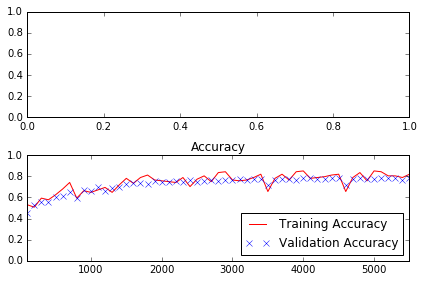

Validation accuracy at 0.7883999943733215


In [8]:

# TODO: Find the best parameters for each configuration
epochs = 5
lr = 0.3
batch_size = 128

log_batch_step = 100
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []


# The file path to save the data
save_file = './model/first_model.ckpt'
# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

init = tf.global_variables_initializer()

cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)    

with tf.Session() as session:
    session.run(init)

    for epoch_i in range(epochs):   
        b = 0
        batches_data = create_batches(batch_size, train_features, train_labels)

        # The training cycle
        for batch_features, batch_labels in batches_data:
            b += 1
                        
            train_feed_dict = {
                features: batch_features,
                Y: batch_labels,
                learning_rate:lr
                }

            session.run(optimizer, feed_dict=train_feed_dict)
            
            if not b % log_batch_step:
                    # Calculate Training and Validation accuracy
                    training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                    validation_accuracy = session.run(accuracy, feed_dict=val_feed_dict)

                    # Log batches
                    previous_batch = batches[-1] if batches else 0
                    batches.append(log_batch_step + previous_batch)
                    train_acc_batch.append(training_accuracy)
                    valid_acc_batch.append(validation_accuracy)

                    
        validation_accuracy = session.run(accuracy, feed_dict=val_feed_dict)
        print("End of Epoch: ", epoch_i)

    saver.save(session, save_file)
    
        
loss_plot = plt.subplot(211)

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')

acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)

plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))
            

### Test Accuracy

In [8]:
# Check accuracy against Test data
save_file = './model/first_model.ckpt'
saver = tf.train.Saver()
    
with tf.Session() as sess:
    saver.restore(sess, save_file)
#     sess.run(init)
    test_accuracy = sess.run(accuracy, feed_dict=test_feed_dict)
print(test_accuracy)

0.8613


## Running in multi-layer perceptron. 

For this model multi-layer perceptron is a over kill and the model is not learning anything. The accuracy is 10%

In [4]:
# All the pixels in the image (28 * 28 = 784)
features_count = 784
h1_node = 256
h2_node = 128
# All the labels
labels_count = 10

# TODO: Set the features and labels tensors
features = tf.placeholder("float", [None, features_count])
Y = tf.placeholder("float", [None, labels_count]) 
learning_rate = tf.placeholder(tf.float32)

print(type(learning_rate))
# TODO: Set the weights and biases tensors
weights = {
    'h1': tf.Variable(tf.random_normal([features_count, h1_node])),
    'h2': tf.Variable(tf.random_normal([h1_node, h2_node])),
    'out': tf.Variable(tf.random_normal([h2_node, labels_count]))
}

print(weights['out'].shape)

biases = {
    'h1': tf.Variable(tf.random_normal([h1_node])),
    'h2': tf.Variable(tf.random_normal([h2_node])),
    'out': tf.Variable(tf.random_normal([labels_count]))
}

<class 'tensorflow.python.framework.ops.Tensor'>
(128, 10)


In [8]:
# Hidden layer with RELU activation
h1_layer = tf.add(tf.matmul(features, weights['h1']), biases['h1'])
h1_output = tf.nn.relu(h1_layer)
h2_layer = tf.add(tf.matmul(h1_output, weights['h2']), biases['h2'])
h2_output = tf.nn.relu(h2_layer)
# Output layer with linear activation
logits = tf.add(tf.matmul(h2_output, weights['out']), biases['out'])


KeyError: 'h2'